## Titanic Tragedy

    On April 14 1912, Titanic crashed into an iceberg and sunk into the Atlantic Ocean. The purpose of this report is to dig some answers from the dataset.

### 1. Questions

    [1] What factors made people more likely to suvive? After browsing the data set, I would like to find out how the factors such as Sex, Age, Fare, Pclass correlated with the Survival rate. 
    [2] If we divide the dataset into two group, one group includes only survived passengers, and the other group includes only non-survived passengers. Is the difference of fare of survived and non-survived is statistically significant? how about the difference of the age of survived and non-survived?

### 2. Data Wrangling

#### 2.1 Data Acquisition
    The data set was downloaded and loaded into a Pandas DataFrame.

In [590]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

titanic_df = pd.read_csv("titanic_data.csv")

Populating the interactive namespace from numpy and matplotlib


In [591]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


#### 2.2 Data Cleaning
    To check if there are some problems in the data set. such as missing values, errors

In [592]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


According to the output of describe() function, here are some problems with the data:

    [1] There are some missing values in the column "Age", total missing number is (891- 714) = 277
    [2] The minimum value of Fare is 0, which should be missing infomation. (or free tickets?)
    [3] The maximum value of Fare is 512.33, which is way too big. It might be a wrong value.

Apart from the problems spotted, there are some useful infomation from the output:
    
    [1] The mean of "Survived" is 0.383838, which tells us the survival rate is also 0.383838. 
    [2] More than 50% of passengers were from Pclass 3

##### 2.2.1 Non-Numeric Column
    As the column "Sex" is not a number, some additonal actions need to be done to get information for this column

In [593]:
titanic_df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [594]:
titanic_df['Sex'].count()

891

From the output above, we can see the column "Sex" has two vluaes: female, male.  And there are no missing values as the count is 891, the same as the total count of passengers.

##### 2.2.2 Deal With Missing Values in Age

    As there are some missing values in Age, I will ignore the rows with missing age when analysing the factor "Age". The new dataframe below is for analysing the factor Age.

In [595]:
titanic_df_age = titanic_df[np.isfinite(titanic_df['Age'])]
titanic_df_age.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,448.582633,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
std,259.119524,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.250000,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700
75%,677.750000,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


### 3. Data Exploration on the Correlation of Survived and  Sex/ Pclass/Age/Fare 

#### 3.1 Exploration of  "Sex"

In [596]:
def plot_bar_chart(data, xlabel, ylabel):
    plt.bar(range(len(data)), data, align='center')
    plt.xticks(range(len(data)), data.keys())
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.show()

##### 3.1.1 Number of Passengers Grouped by Sex

Sex
female    314
male      577
Name: Survived, dtype: int64


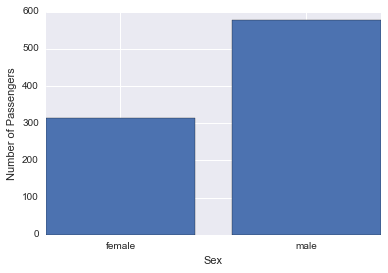

In [597]:
sex_grouped_count = titanic_df.groupby("Sex")['Survived'].count()
print sex_grouped_count
plot_bar_chart(sex_grouped_count, 'Sex', 'Number of Passengers')

##### 3.1.2 Number of Survivied Passengers Grouped by Sex

Sex
female    233
male      109
Name: Survived, dtype: int64


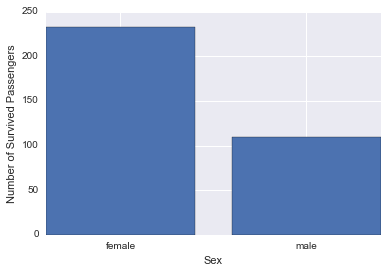

In [598]:
sex_grouped_sum = titanic_df.groupby("Sex")['Survived'].sum()
print sex_grouped_sum
plot_bar_chart(sex_grouped_sum, 'Sex', 'Number of Survived Passengers')

##### 3.1.3 Survival Rate Grouped by Sex

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


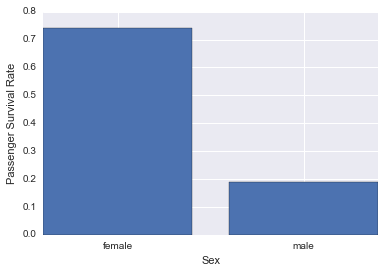

In [599]:
sex_grouped_mean = titanic_df.groupby("Sex")['Survived'].mean()
print sex_grouped_mean
plot_bar_chart(sex_grouped_mean, 'Sex', 'Passenger Survival Rate')

#### 3.2  Exploration of Pclass

##### 3.2.1 Number of Passengers Grouped by Pclass

Pclass
1    216
2    184
3    491
Name: Survived, dtype: int64


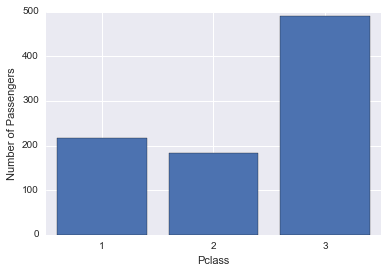

In [600]:
class_grouped_count = titanic_df.groupby("Pclass")['Survived'].count()
print class_grouped_count
plot_bar_chart(class_grouped_count, 'Pclass', 'Number of Passengers')

##### 3.2.2 Number of Survived Passengers Grouped by Pclass

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64


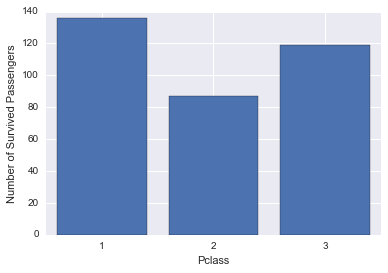

In [601]:
class_grouped_sum = titanic_df.groupby("Pclass")['Survived'].sum()
print class_grouped_sum
plot_bar_chart(class_grouped_sum, 'Pclass', 'Number of Survived Passengers')

##### 3.2.3 Passenger Survival Rate Grouped by Pclass

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


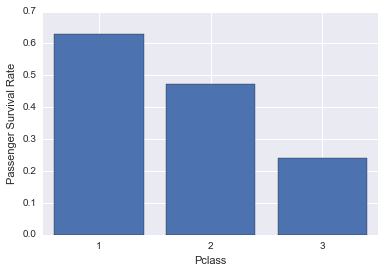

In [602]:
class_grouped_mean = titanic_df.groupby("Pclass")['Survived'].mean()
print class_grouped_mean
plot_bar_chart(class_grouped_mean, 'Pclass', 'Passenger Survival Rate')

#### 3.3 Combine Sex and Pclass
##### 3.3.1 Number of Passengers Grouped by Sex and Pclass

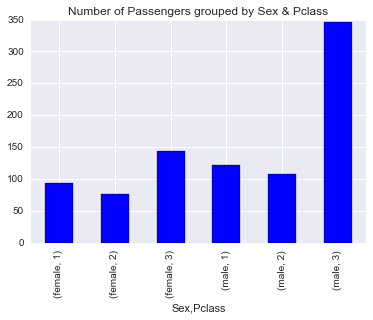

In [603]:
sex_class_grouped_count = titanic_df.groupby(["Sex","Pclass"])['Survived'].count()
    
sex_class_grouped_count.plot(title='Number of Passengers grouped by Sex & Pclass',kind="bar")

##### 3.3.2 Passenger Survival Rate Grouped by Sex and Pclass

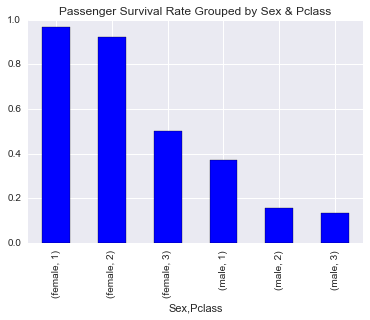

In [604]:
sex_class_grouped_mean = titanic_df.groupby(["Sex","Pclass"])['Survived'].mean()
    
sex_class_grouped_mean.plot(title='Passenger Survival Rate Grouped by Sex & Pclass',kind="bar")

##### 3.3.3 Another Visualisaition to Show the Contrast

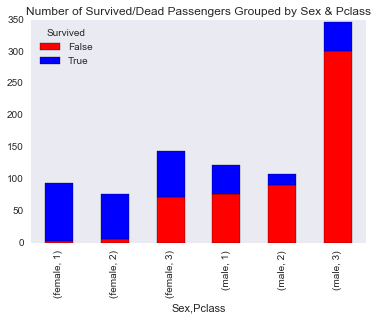

In [605]:
cross_tab = pd.crosstab([titanic_df.Sex, titanic_df.Pclass], titanic_df.Survived.astype(bool))
cross_tab.plot(kind='bar', stacked=True, color=['red','blue'], grid=False,\
               title="Number of Survived/Dead Passengers Grouped by Sex & Pclass")

#### 3.4 Age

##### 3.4.1  Age Distribution

In [606]:
def plot_hist(data,bin_num, xlabel, ylabel,title):
    plt.hist(data, bins = bin_num, range = (data.min(),data.max()))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

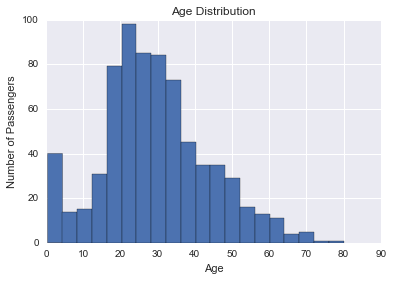

In [607]:
plot_hist(titanic_df_age['Age'], 20,'Age','Number of Passengers',"Age Distribution" )

##### 3.4.2 Number of Survived Passengers Grouped by Age
    As the column "Age" is not like Sex or Pclass, when calculating the number of survived passengers groupped by age, it is better to define a few age groups, and create a new column (named "Age_Group"). After we fill the values in this column based on the Age value, we can calculate the number of survived passengers grouped by "Age_Group".

In [608]:
age_group_list = []
for age in titanic_df_age['Age']:
    if age >=0 and age<=10:
        age_group_list.append("0-10")
    elif age >10 and age <= 20:
        age_group_list.append("10-20")
    elif age >20 and age <= 30:
        age_group_list.append("20-30")
    elif age >30 and age <= 40:
        age_group_list.append("30-40")
    elif age >40 and age <= 50:
        age_group_list.append("40-50")
    elif age >50 and age <= 60:
        age_group_list.append("50-60")
    elif age >60 and age <= 80:
        age_group_list.append("60-80")
    else:
        age_group_list.append("Failed")

titanic_df_age.insert(len(titanic_df_age.columns),"Age_Group",age_group_list)
titanic_df_age.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,20-30
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,30-40
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,20-30
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,30-40
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,30-40


In [609]:
age_grouped_survival_count = titanic_df_age.groupby(["Age_Group"])['Survived'].apply(sum).reset_index()
age_grouped_survival_count

,Age_Group,Survived
0,0-10,38
1,10-20,44
2,20-30,84
3,30-40,69
4,40-50,33
5,50-60,17
6,60-80,5


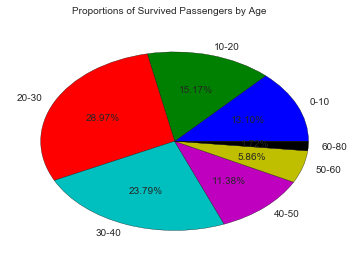

In [610]:
plt.pie(x = age_grouped_survival_count['Survived'], \
        labels = age_grouped_survival_count['Age_Group'], \
        autopct = '%.2f%%')
plt.suptitle('Proportions of Survived Passengers by Age')

##### 3.4.3 Correlation of Age and Survival Rate

In [611]:
def correlation(x, y):
    std_x = (x - x.mean()) / x.std(ddof=0)
    std_y = (y - y.mean()) / y.std(ddof=0)
    return (std_x * std_y ).mean()

In [612]:
age_grouped_mean = titanic_df_age.groupby(["Age"],as_index = False).mean()
print "Correlation of Age and Survival Rate: " + \
    str(correlation(age_grouped_mean['Age'],age_grouped_mean['Survived']))

Correlation of Age and Survival Rate: -0.367962981481


#### 3.5 Fare

##### 3.5.1 Fare Distribution

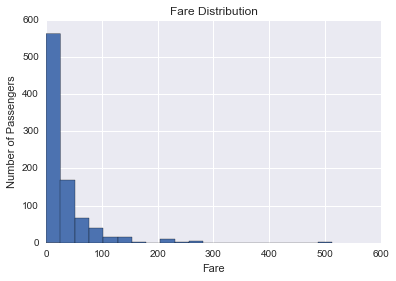

In [613]:
plot_hist(titanic_df['Fare'],20,'Fare','Number of Passengers',"Fare Distribution")

##### 3.5.2 Number of Survived Passengers Grouped by Fare

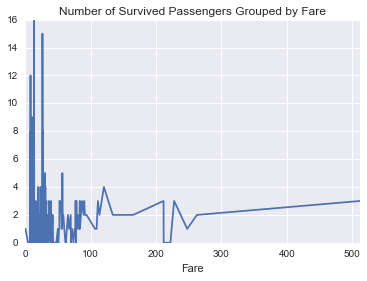

In [614]:
fare_grouped_survival_count = titanic_df.groupby(["Fare"])['Survived'].sum()
fare_grouped_survival_count.plot(title='Number of Survived Passengers Grouped by Fare',kind="line")

##### 3.5.3 Correlation of Fare and Survival Rate

In [615]:
fare_grouped_mean = titanic_df.groupby(["Fare"],as_index = False).mean()
print "Correlation of Pclass and Survival Rate: " + \
    str(correlation(age_grouped_mean['Fare'],age_grouped_mean['Survived']))

Correlation of Pclass and Survival Rate: 0.217067674894


### 4. Analysis and Statistic Test on Age (Survived/Non-survived)
    When dividing the passengers into two groups(survived/non-survived), we get two samples of Age which can be used to perform a statistical test.
#### 4.1 Mean of Age Visualisation Grouped by "Survived"
    AS There are some missing values in the column "Age", the cleaned data frame (titanic_df_age) will be used instead when calculating the mean of age.

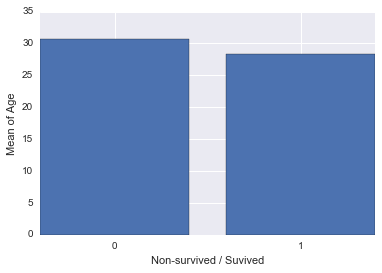

In [616]:
age_mean_grouped_survived = titanic_df_age.groupby(["Survived"])['Age'].mean()
plot_bar_chart(age_mean_grouped_survived, 'Non-survived / Suvived', 'Mean of Age')

#### 4.2  Statistical Test on Age
##### 4.2.1 Export Age Samples
    The code below will export a csv file containing two columns of Age, one for Non-survived, and one for survived. The two columns are actually two samples with different sample size.

In [617]:
def export_csv_divided_by_survived(data,col_name, file_name):
    grouped_survived = data[data.Survived == 1][col_name].values
    grouped_non_survived = data[data.Survived == 0][col_name].values
    data_df = pd.DataFrame({"Survived": pd.Series(grouped_survived), \
                           "Non-survived":pd.Series(grouped_non_survived)})
    data_df.to_csv(file_name)
    return data_df

In [618]:
age_df = export_csv_divided_by_survived(titanic_df_age,"Age","Age_Statistics.csv")
age_df.describe()

,Non-survived,Survived
count,424.000000,290.000000
mean,30.626179,28.343690
std,14.172110,14.950952
min,1.000000,0.420000
25%,21.000000,19.000000
50%,28.000000,28.000000
75%,39.000000,36.000000
max,74.000000,80.000000


##### 4.2.2 Statistical Test on Age Samples
    There are two independent samples(non-survived/survived), therefore an independent t-Test will be performed.
    [1] Hypotheses
        Null Hypotheses - H0: us= un
            The age of survived and non-survived passengers does not differ at an alpha level of .05. 
        Alternative Hypotheses - HA: us ≠ un
            The age of survived and non-survived passengers does statistically differ at an alpha level of .05
    
    [2] Perform t-Test
        The sample size, mean, std for the two samples is listed in the table above. Below is the result of the 
        t-test calculations:
            SE: 1.116
            t-statistic value: 2.046
            df: 424+290-2 = 712
            Confidence level α: 0.05
            t-critical value: ± 1.962 ( two-tailed)
    
    [3] Conclusion of the t-Test
        P Value Results (with t=2.046   DF=712)
        The two-tailed P value equals 0.0411
        By conventional criteria, this difference is considered to be statistically significant. 
        I do reject the null hypothesis. The age of non-survived passengers is statistically bigger than survived
        passengers.
    
   
### 5. Analysis and Statistic Test on Fare (Survived/Non-survived)¶
    When dividing the passengers into two groups by survived/non-survived, we get two samples of "Fare" which can be used to perform a statistical test.
#### 5.1 Mean of Fare Visualisation Grouped by "Survived"

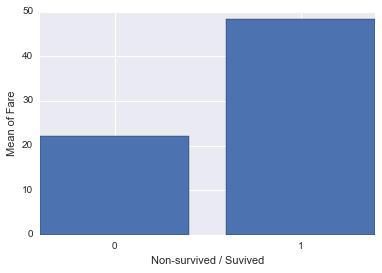

In [619]:
fare_mean_grouped_survived = titanic_df.groupby(["Survived"])['Fare'].mean()
plot_bar_chart(fare_mean_grouped_survived, 'Non-survived / Suvived', 'Mean of Fare')

#### 5.2  Statistical Test on Fare
##### 5.2.1 Export Fare Samples
    The code below will export a csv file containing two columns of Fare, one for Non-survived, and one for survived. The two columns are actually two samples with different sample size.

In [620]:
fare_df = export_csv_divided_by_survived(titanic_df,"Fare","Fare_Statistics.csv")
fare_df.describe()

,Non-survived,Survived
count,549.000000,342.000000
mean,22.117887,48.395408
std,31.388207,66.596998
min,0.000000,0.000000
25%,7.854200,12.475000
50%,10.500000,26.000000
75%,26.000000,57.000000
max,263.000000,512.329200


##### 5.2.2 Statistical Test on Fare Samples
    There are two independent samples(non-survived/survived), therefore an independent t-Test will be performed.
    [1] Hypotheses
        Null Hypotheses - H0: us = un
            The fare of survived and non-survived passengers does not differ at an alpha level of .05. 
        Alternative Hypotheses -  HA: us ≠ un
            The fare of survived and non-survived passengers does statistically differ at an alpha of .05
    
    [2] Perform t-Test
        The sample size, mean, std for the two samples is listed in the table above. Below is the result of the 
        t-test calculations:
            SE: 3.842
            t-statistic value: -6.839
            df: 549+343-2 = 889
            Confidence level α: 0.05
            t-critical value: ± 1.962 ( two-tailed)
    
    [3] Conclusion of the T-test
        P Value Results (with t=-6.839   DF=889)
        The two-tailed P value is less than 0.0001
        By conventional criteria, this difference is considered to be extremely statistically significant.
        I do reject the null hypothesis. The fare of non-survived passengers is statistically smaller than survived
        passengers.

### 6. Conclusions
#### 6.1 The Results of the Analysis
    [1] Sex is a big factor which effects the survival rate. Among the total 891 passengers, there are 577 male passengers and 314 female passengers; however, 233 female passengers survived while only 109 male survived; the female survival rate is 0.74 while the maile survival rate is 0.19. Female Passengers have a much higher survival rate.
    
    [2] Pclass is also a big factor, Among the total 891 passengers, more than half of the passengers belong to the Pclass 3, but they have the lowest survived number and lowest survival rate. Passengers from Pclass 1 have the highest survial rate, followed by Pclass 2, and then Pclass 3.
    
    [3] By putting the two factors together (Sex and Pclass), it is clear that female passengers from Pclass 1 have the highest survival rate, while male passengers from Pclass 3 have the lowest survival rate; female passengers from Pclass 3 still have a higher survival rate than Male passengers from Pcass 1. 
    
    [4] Age is another factor which effects the survival rate.
    From the pie chart which shows the distribution of number of survived passengers, we can clearly see elder passengers (50+ years old) have a much lower proportion than younger passengers.
    The correlation of age and survival rate is -0.37, which means generally younger passengers are more likely to survive. However, correlaiton does not mean causation. 
    According to the t-test on the Age of two samples(non-survived/survived), we can see that the age of non-survived passengers is statistically bigger than the age of survived passengers.
    
    [5] The correlation of Fare and survival rate is 0.22, which means generally the higher the fare, the higher survival rate it is. However, correlaiton does not mean causation. 
    According to the t-test on the Fare of two samples(non-survived/survived), we can see that the fare of non-survived passengers is statistically smaller than the fare of survived passengers.
    
#### 6.2 The Limitations of the Analysis
    [1] As there are some missing values in "Age", I simply ignored the rows(passengers) when analysing "Age", this method makes sure that we have the accurate values of age for analysing, but it directly reduces the sample size of the dataset, and it will probably effect the accuracy of the statistics. Alternatively, we can keep the rows of missing age by simply filling the missing age with the mean of the column "Age", in this way this sample size of the dataset keeps the same, but it largly increases the number of middle-aged passengers(as the mean of all the passengers is around 30 years old), and it will effect the proportion distribution of the survived passengers.
    
    [2] There are some other columns which were not mentioned and analysed in this report, such as SibSp, Parch, Cabin and Embarked. They also might be big factors which made people more likely to survive. Further analysis on these columns can be done to have a deeper and more comprehensive exploration of the Titanic dataset.

### 7. References

    [1] http://www.dataiku.com/blog/2014/05/12/DSS-Titanic-Kaggle-part-1.html
    [2] https://statsguys.wordpress.com/2014/01/03/first-post/
    [3] http://www.tableau.com/blog/titanic-data-analysis-from-tableau-customer
    [4] http://www.analyticsvidhya.com/blog/2014/08/baby-steps-python-performing-exploratory-analysis-python/
    [5] https://www.google.co.uk/url?sa=t&rct=j&q=&esrc=s&source=web&cd=1&cad=rja&uact=8&ved=0ahUKEwiezdqM-qHLAhVCdw8KHe43DfUQFggkMAA&url=http%3A%2F%2Fmyweb.fsu.edu%2Ftzuehlke%2F5427%2Ffiles%2Ftitanic.pdf&usg=AFQjCNHi0NlXjHAK599AjmxnkKDuUsErhQ
    [6] https://www.google.co.uk/url?sa=t&rct=j&q=&esrc=s&source=web&cd=1&cad=rja&uact=8&ved=0ahUKEwjq1JKe-qHLAhUKOxQKHT6YC-wQFggjMAA&url=https%3A%2F%2Fwww.kaggle.com%2Fblobs%2Fdownload%2Fforum-message-attachment-files%2F935%2FTitanic%2520Solution%2520_%2520Varun%2520Kadekar.pptx&usg=AFQjCNF3kgqBEkzeSzwcRQJCBwiohtqMCw&bvm=bv.115339255,d.ZWU